<a href="https://colab.research.google.com/github/zecyneps/zecyneps/blob/main/Default_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#Dataframe
df = pd.read_excel("end_cleaned_file.xlsx")

Question 1: How primary pollution sources influence PM2.5 and PM10 levels across the Aegean Region?

<ipython-input-41-e114360c9e5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)
<ipython-input-41-e114360c9e5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)
<ipython-input-41-e114360c9e5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)


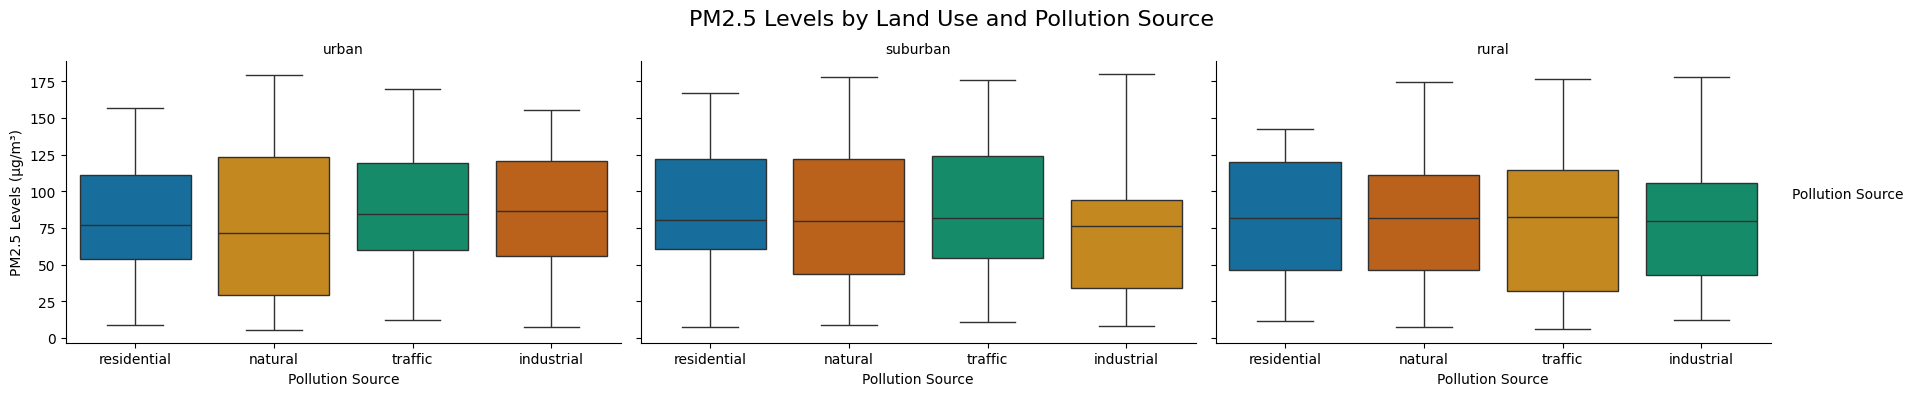

In [ ]:
def custom_boxplot(data, x, y, **kwargs):
    order = data[x].unique()  # Dynamically extract the order for x-axis
    sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)

# Use FacetGrid with map_dataframe
g = sns.FacetGrid(
    df,
    col='land_use',  # Separate by land use types
    col_wrap=3,      # Wrap after 3 plots per row
    height=4,        # Height of each plot
    aspect=1.5,      # Aspect ratio
)
g.map_dataframe(custom_boxplot, x='pollution_source', y='pm25_level')
g.add_legend(title='Pollution Source')
g.set_titles("{col_name}")
g.set_axis_labels('Pollution Source', 'PM2.5 Levels (µg/m³)')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('PM2.5 Levels by Land Use and Pollution Source', fontsize=16)
plt.show()

<ipython-input-42-737470b04340>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)
<ipython-input-42-737470b04340>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)
<ipython-input-42-737470b04340>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)


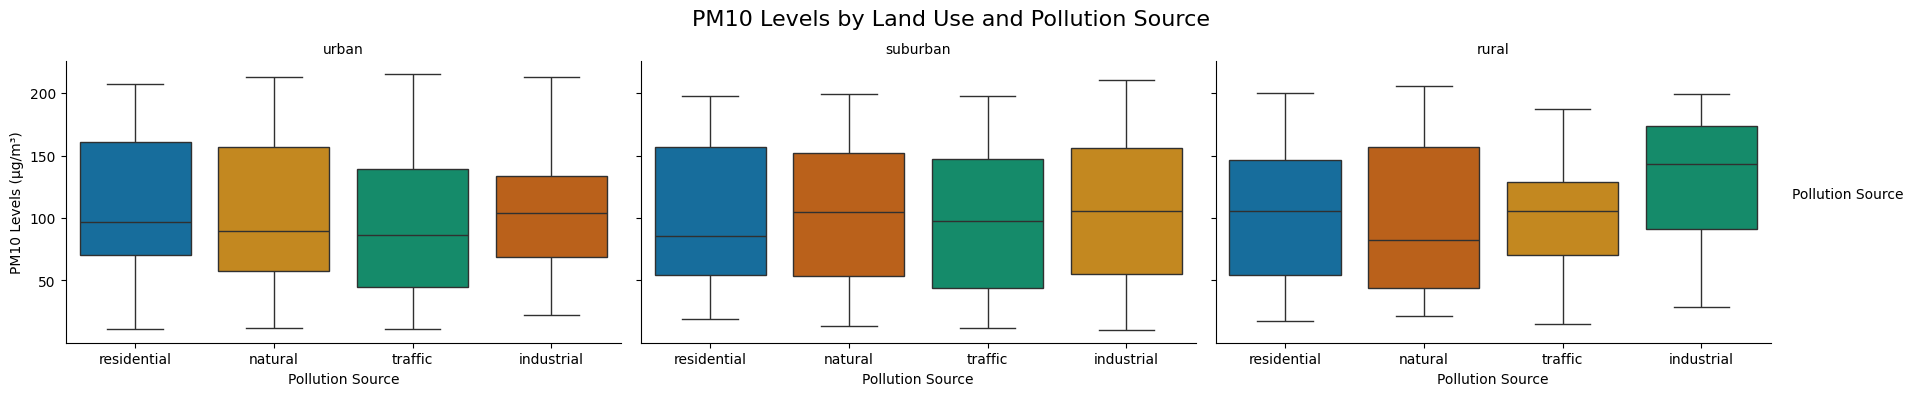

In [ ]:
def custom_boxplot(data, x, y, **kwargs):
    order = data[x].unique()  # Dynamically extract the order for x-axis
    sns.boxplot(data=data, x=x, y=y, order=order,palette="colorblind" , **kwargs)

# Use FacetGrid with map_dataframe
g = sns.FacetGrid(
    df,
    col='land_use',  # Separate by land use types
    col_wrap=3,      # Wrap after 3 plots per row
    height=4,        # Height of each plot
    aspect=1.5,      # Aspect ratio
)
g.map_dataframe(custom_boxplot, x='pollution_source', y='pm10_level')
g.add_legend(title='Pollution Source')
g.set_titles("{col_name}")
g.set_axis_labels('Pollution Source', 'PM10 Levels (µg/m³)')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('PM10 Levels by Land Use and Pollution Source', fontsize=16)
plt.show()

Question 2: What are the correlations between different pollutants (CO vs. NO2, SO2 vs. PM2.5)?

<Figure size 800x600 with 0 Axes>

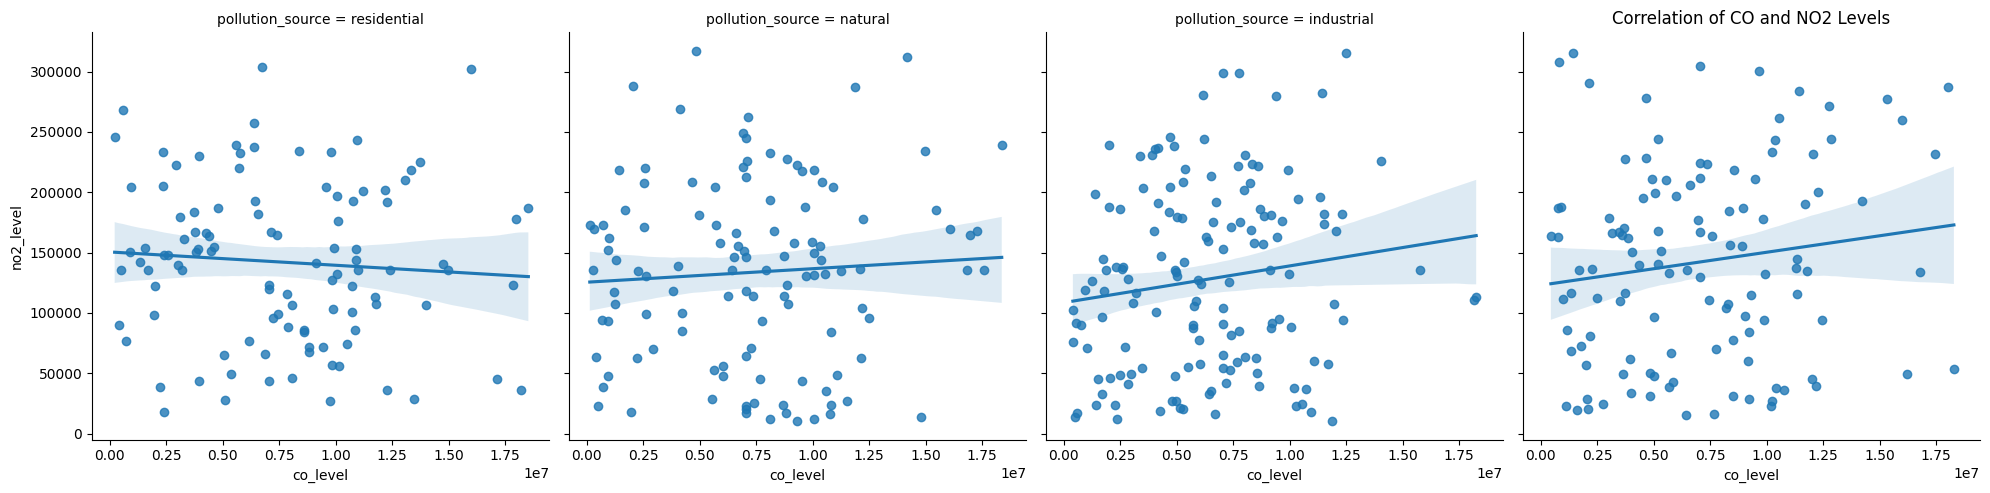

In [ ]:
plt.figure(figsize=(8, 6))
data_sheet = df
sns.lmplot(data=data_sheet, x="co_level", y="no2_level", col="pollution_source")
plt.title("Correlation of CO and NO2 Levels")
plt.show()

<Figure size 800x600 with 0 Axes>

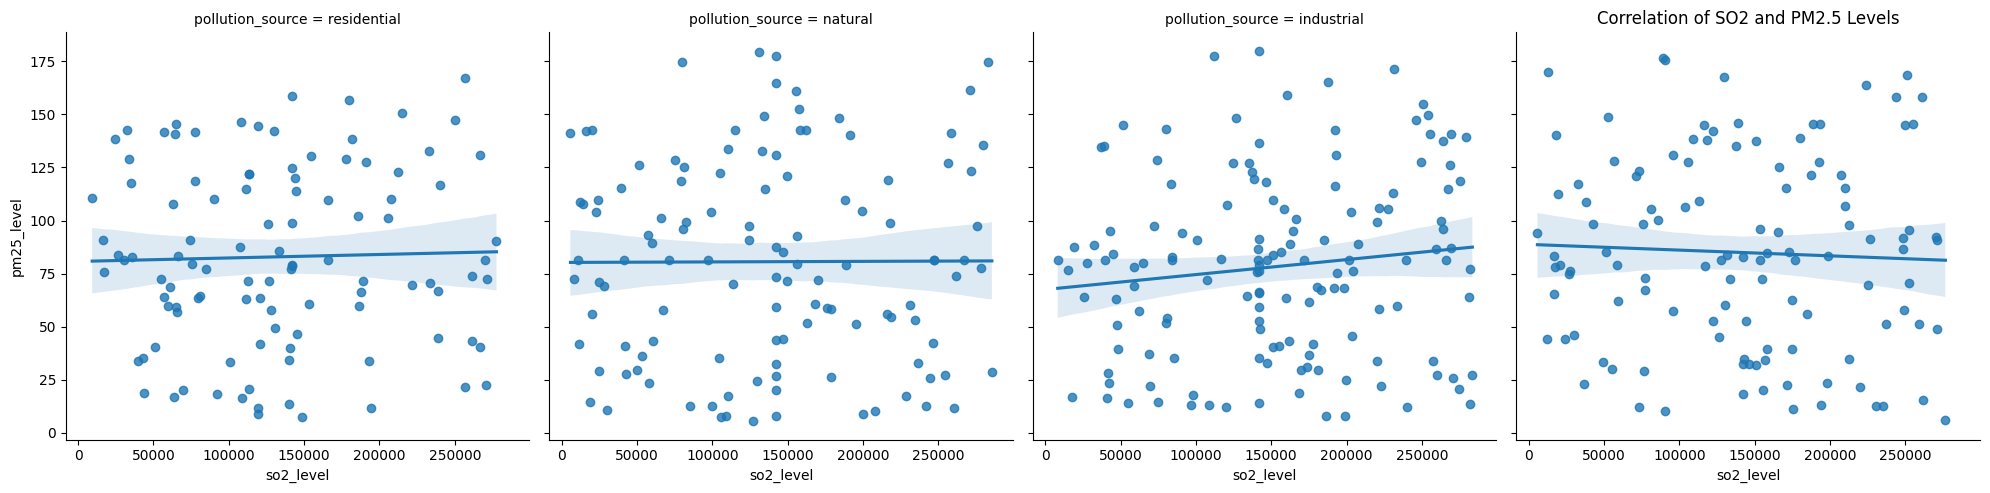

In [ ]:
plt.figure(figsize=(8, 6))
data_sheet = df
sns.lmplot(data=data_sheet, x="so2_level", y="pm25_level", col="pollution_source")
plt.title("Correlation of SO2 and PM2.5 Levels")
plt.show()

Question 3: How have the NO2, SO2, CO, and O3 changed over the years?

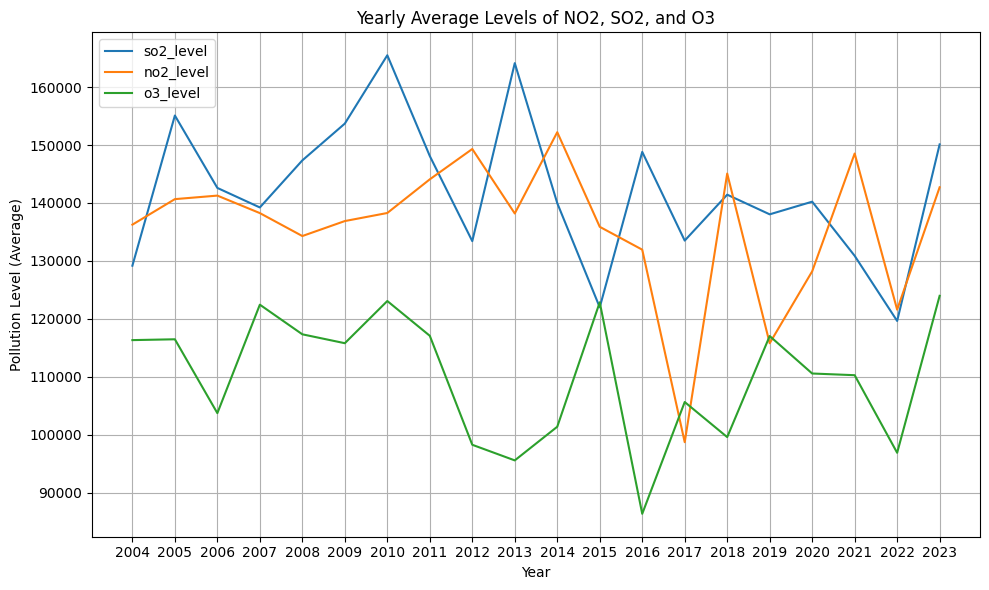

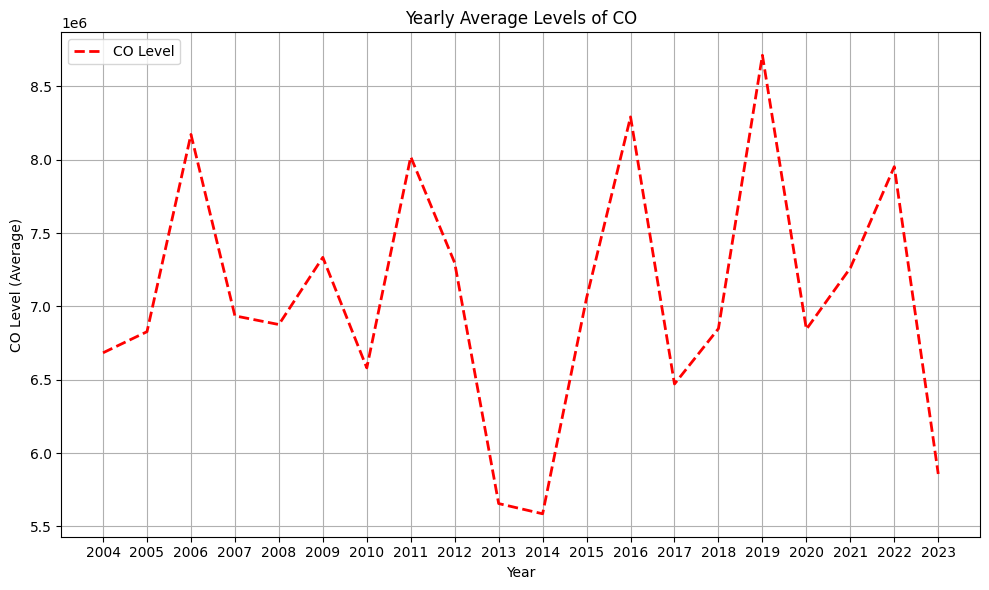

In [ ]:

# Calculate yearly average pollution levels
pollution_yearly_avg = df.groupby('year')[['so2_level', 'no2_level', 'co_level', 'o3_level']].mean()

# Plot NO2, SO2, O3 levels in one plot
fig1, ax1 = plt.subplots(figsize=(10, 6))

for column in ['so2_level', 'no2_level', 'o3_level']:
    ax1.plot(pollution_yearly_avg.index, pollution_yearly_avg[column], label=column)

ax1.set_xlabel("Year")
ax1.set_ylabel("Pollution Level (Average)")
ax1.set_title("Yearly Average Levels of NO2, SO2, and O3")
ax1.legend(loc="upper left")
ax1.grid(True)

# Set x-axis ticks for each year
plt.xticks(pollution_yearly_avg.index)
plt.tight_layout()
plt.show()

# Plot CO levels in a separate plot
fig2, ax2 = plt.subplots(figsize=(10, 6))

ax2.plot(pollution_yearly_avg.index, pollution_yearly_avg['co_level'], label='CO Level', color='red', linewidth=2, linestyle='--')

ax2.set_xlabel("Year")
ax2.set_ylabel("CO Level (Average)")
ax2.set_title("Yearly Average Levels of CO")
ax2.legend(loc="upper left")
ax2.grid(True)

# Set x-axis ticks for each year
plt.xticks(pollution_yearly_avg.index)
plt.tight_layout()
plt.show()

Question 4:Do years with implemented action plans show lower pollution levels compared to years without action plans? #ATAKAN


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/

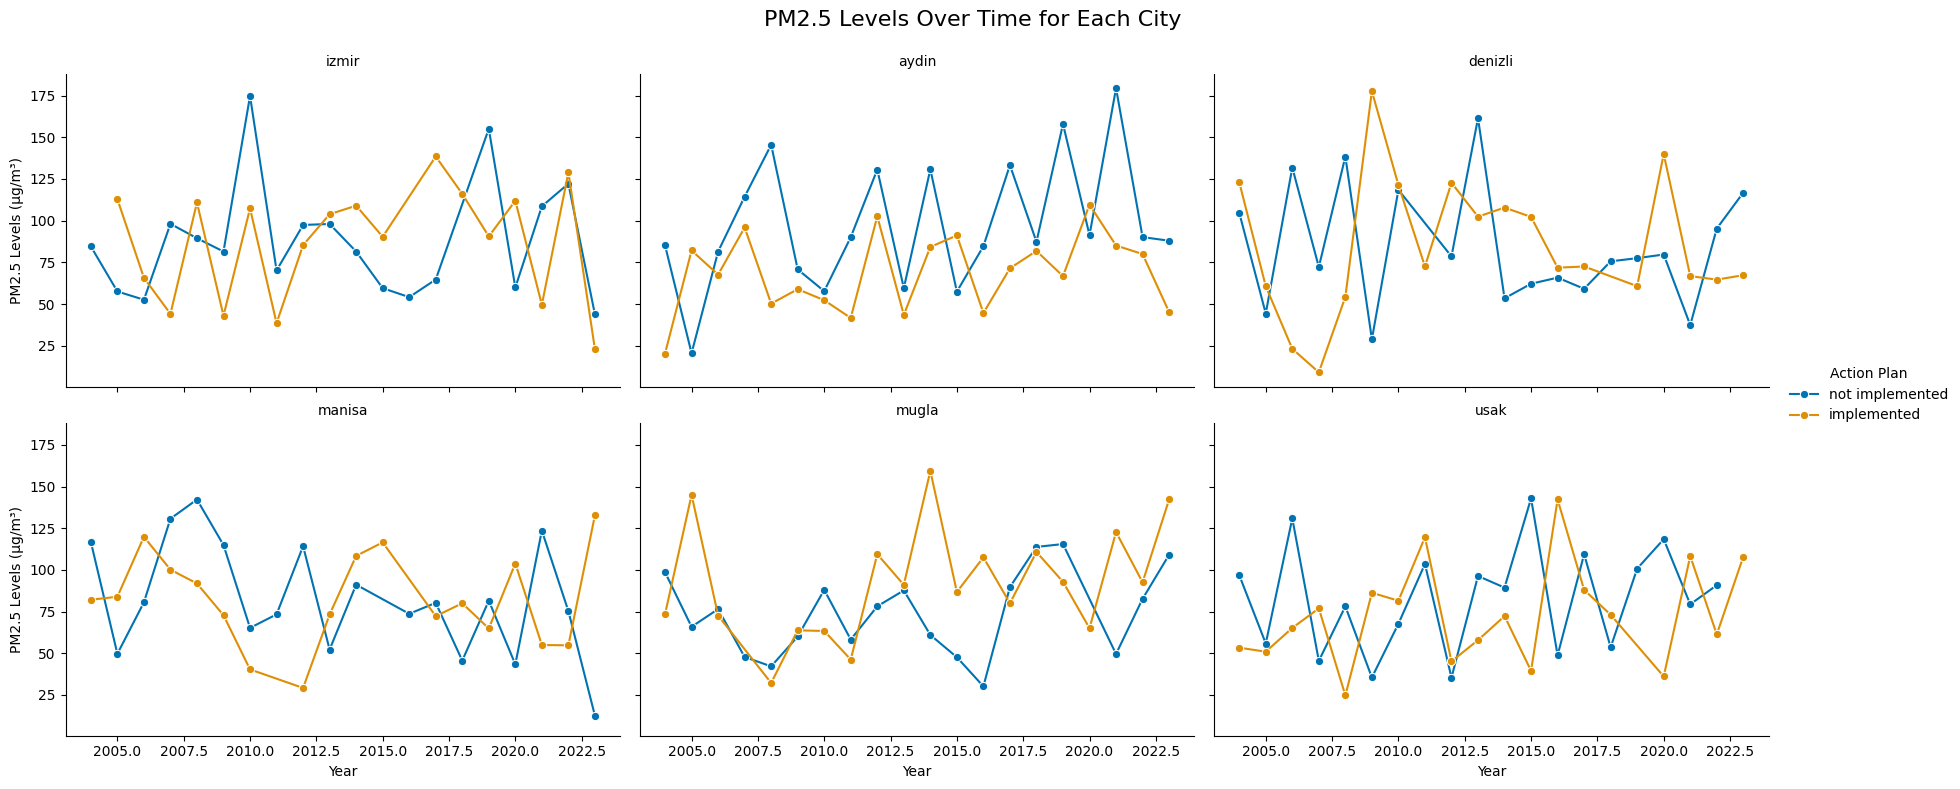

In [ ]:
# Create a FacetGrid
g = sns.FacetGrid(
    df,
    col="province",  # Separate plots by city
    col_wrap=3,      # Wrap plots after 3 columns
    height=4,        # Height of each plot
    aspect=1.5       # Aspect ratio of each plot
)

# Map the lineplot to each facet
g.map(
    sns.lineplot,
    "year",
    "pm25_level",
    "action_plan",
    marker="o",
    ci=None,
    palette="colorblind"
)

# Add title and labels
g.set_titles("{col_name}")
g.set_axis_labels("Year", "PM2.5 Levels (µg/m³)")
g.add_legend(title="Action Plan")

# Show the plot
plt.subplots_adjust(top=0.9)
g.fig.suptitle("PM2.5 Levels Over Time for Each City", fontsize=16)
plt.show()

<ipython-input-47-58f76fc41a61>:1: FutureWarning: The provided callable <function mean at 0x78352e928e00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pollution_heatmap = df.pivot_table(


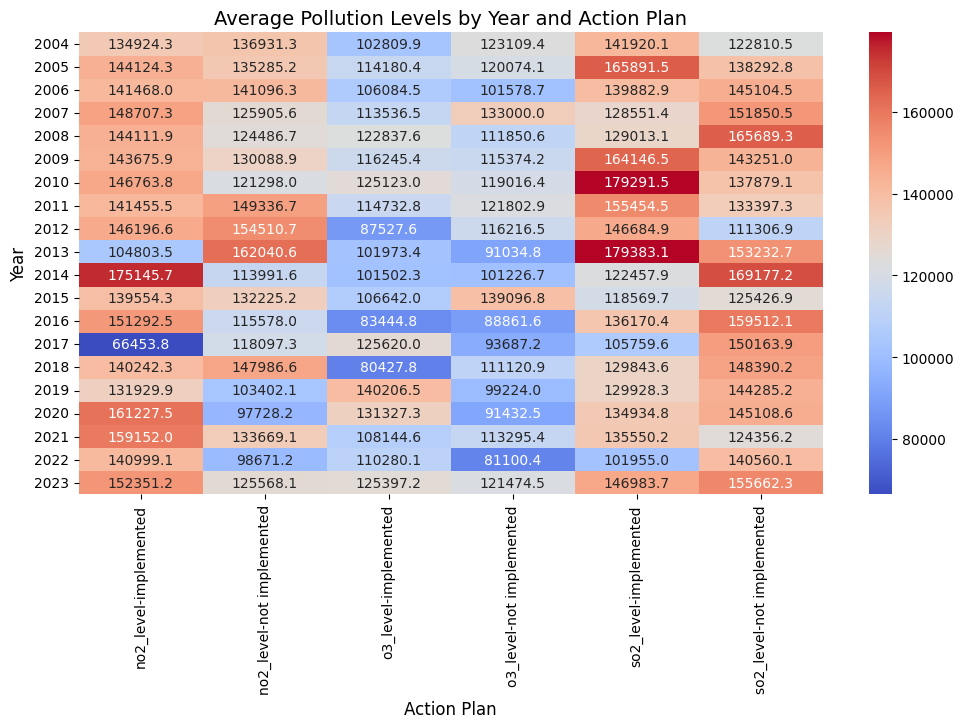

In [ ]:
pollution_heatmap = df.pivot_table(
    values=['so2_level', 'no2_level', 'o3_level'],
    index='year',
    columns='action_plan',
    aggfunc=np.mean
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pollution_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Average Pollution Levels by Year and Action Plan', fontsize=14)
plt.xlabel('Action Plan', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

<ipython-input-48-606ee9047760>:1: FutureWarning: The provided callable <function mean at 0x78352e928e00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pollution_heatmap = df.pivot_table(


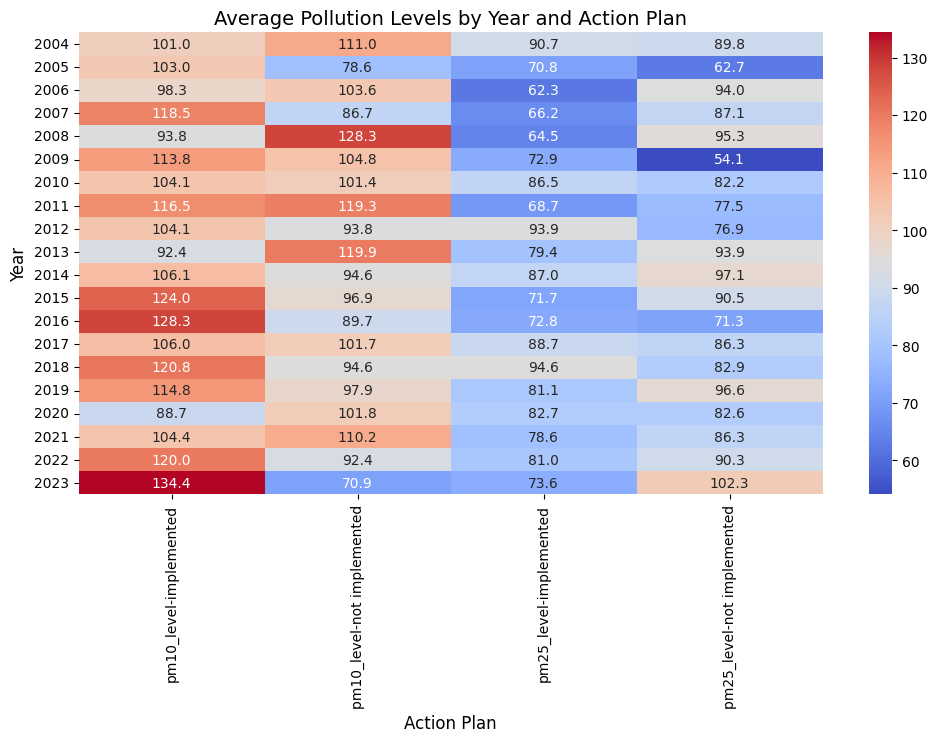

In [ ]:
pollution_heatmap = df.pivot_table(
    values=['pm25_level', 'pm10_level'],
    index='year',
    columns='action_plan',
    aggfunc=np.mean
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pollution_heatmap, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Average Pollution Levels by Year and Action Plan', fontsize=14)
plt.xlabel('Action Plan', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

Question5: How have Ozone (O₃), NO₂, SO₂ and CO Concentrations changed in the last 5 years?


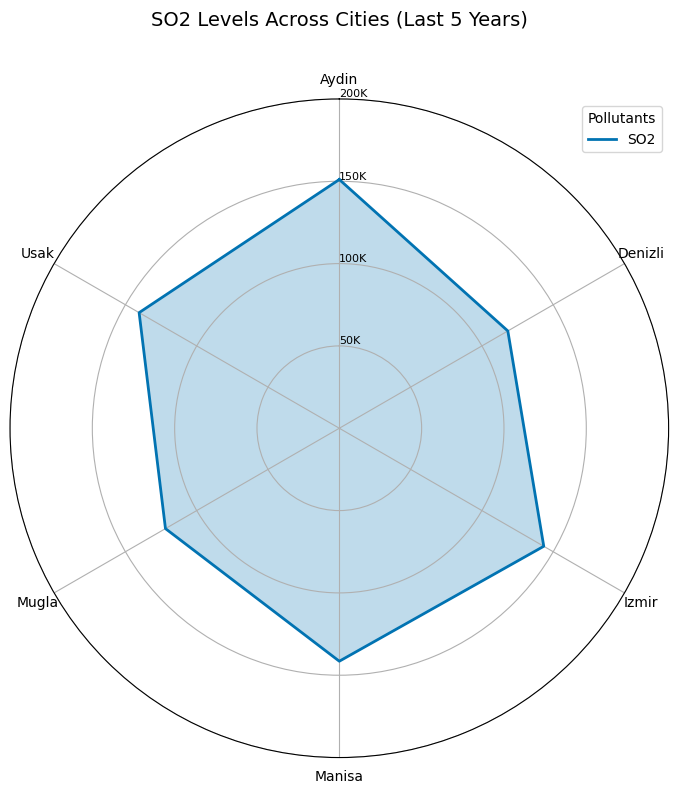

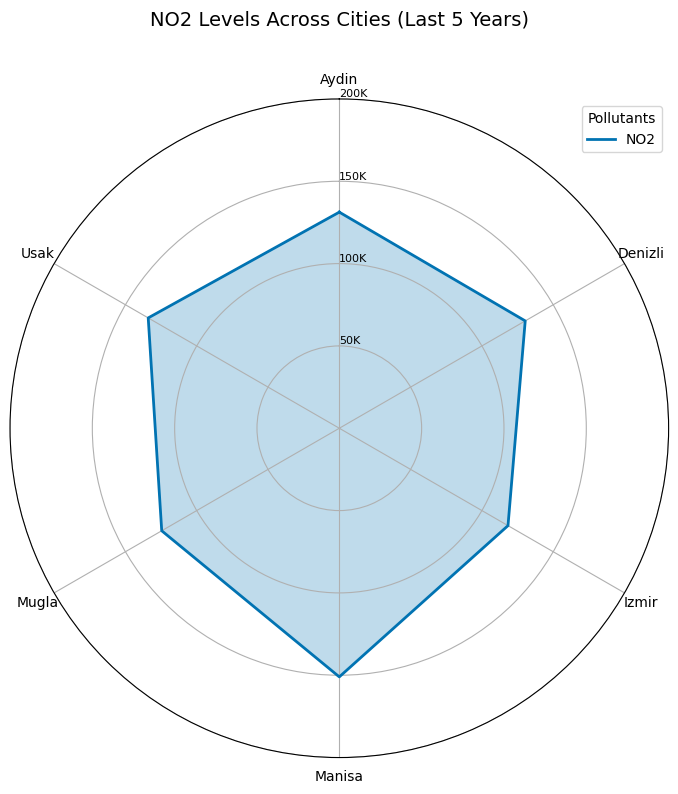

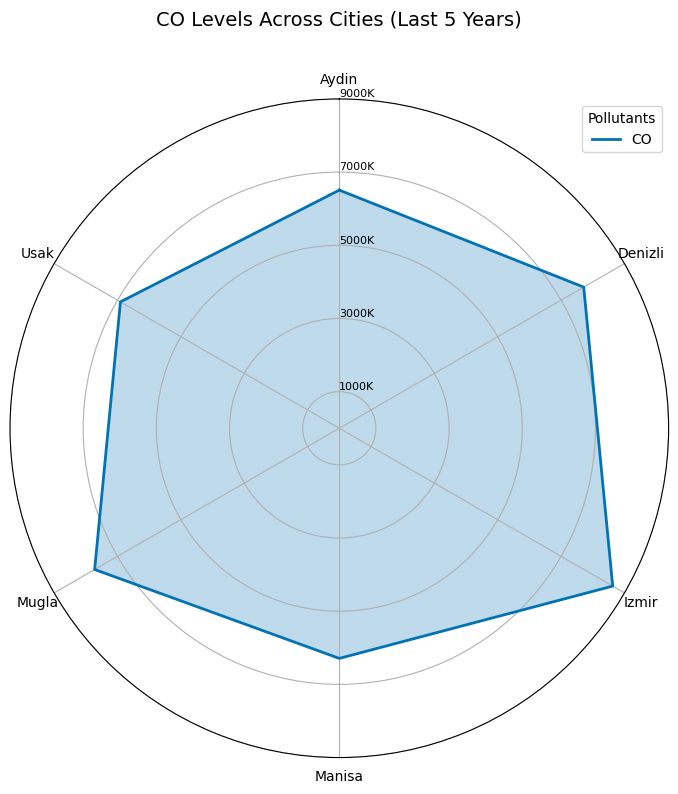

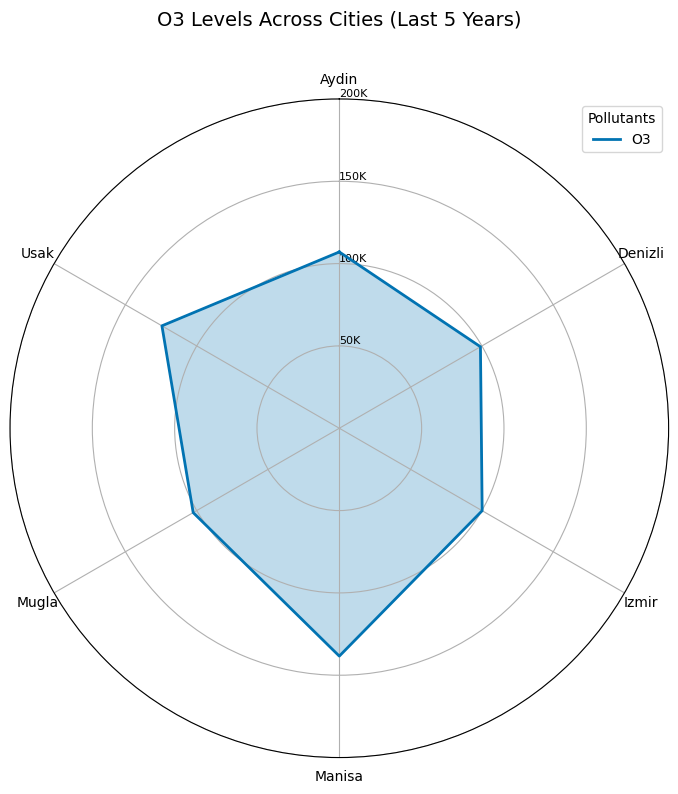

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

# Ensure numeric year and pollutant columns
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df[['so2_level', 'no2_level', 'co_level', 'o3_level']] = df[
    ['so2_level', 'no2_level', 'co_level', 'o3_level']
].apply(pd.to_numeric, errors='coerce')

# Filter for the last 5 years
last_5_years = df[df['year'] >= df['year'].max() - 4]

# Calculate average pollutant levels for each city
pollutant_means = last_5_years.groupby('province')[['so2_level', 'no2_level', 'co_level', 'o3_level']].mean()
pollutant_means = pollutant_means.reset_index()

# Prepare data for radar chart
categories = pollutant_means['province'].tolist()  # Cities
num_vars = len(categories)

# Compute angles for each category
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Define pollutants
pollutants = ['so2_level', 'no2_level', 'co_level', 'o3_level']
custom_ticks = {
    'co_level': [1000000, 3000000, 5000000, 7000000, 9000000],
    'default': [50000, 100000, 150000, 200000]
}

# Colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind")

# Generate radar charts for each pollutant
for pollutant in pollutants:
    # Initialize radar chart for the pollutant
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Prepare data for the current pollutant
    values = pollutant_means[pollutant].tolist()
    values += values[:1]  # Close the radar chart

    # Determine tick values based on pollutant
    ticks = custom_ticks['co_level'] if pollutant == 'co_level' else custom_ticks['default']

    # Plot data for the pollutant
    ax.plot(angles, values, label=pollutant.replace('_level', '').upper(), linewidth=2, color=colorblind_palette[0])
    ax.fill(angles, values, alpha=0.25, color=colorblind_palette[0])

    # Customize the chart
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([city.capitalize() for city in categories], fontsize=10)
    ax.set_rlabel_position(0)
    ax.set_yticks(ticks)
    ax.set_yticklabels([f"{int(tick / 1000)}K" for tick in ticks], fontsize=8)
    ax.set_title(f"{pollutant.replace('_level', '').upper()} Levels Across Cities (Last 5 Years)", fontsize=14, y=1.1)
    ax.legend(loc='upper right', fontsize=10, title="Pollutants")

    # Show the plot
    plt.tight_layout()
    plt.show()


5. SORU which provinces have the highest pollution levels


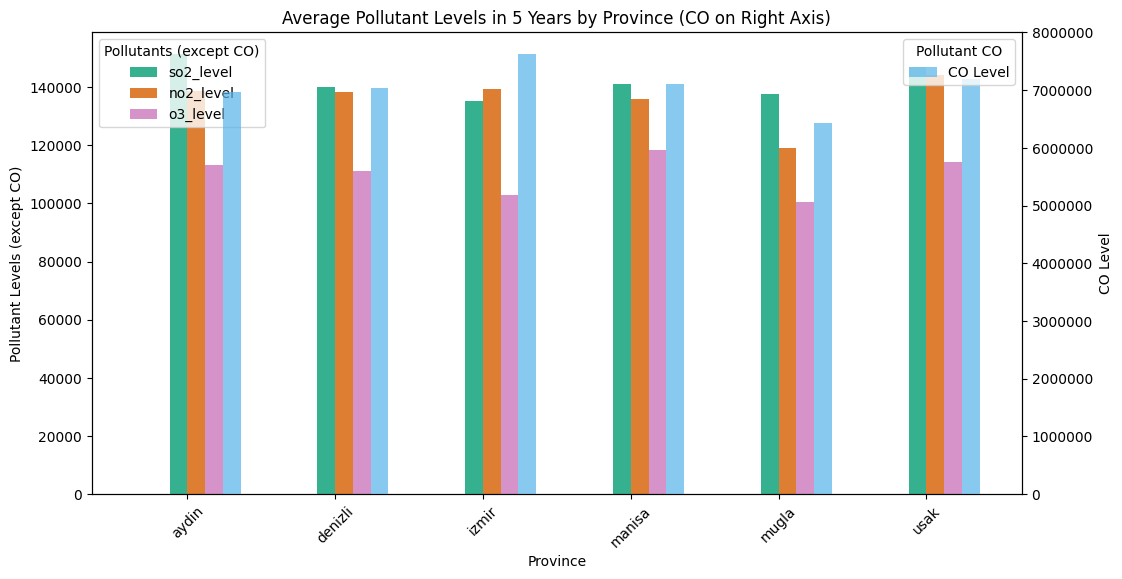

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color-blind dostu renk paleti
palette = sns.color_palette("colorblind")

# Excel dosyasını oku
df = pd.read_excel("end_cleaned_file.xlsx")

# Her ilin ortalama kirlilik seviyelerini hesapla
province_avg = df.groupby("province").mean(numeric_only=True)



# Mevcut kirleticileri belirle
all_pollutants = ["pm25_level", "pm10_level", "so2_level", "no2_level", "o3_level"]
pollutants_except_co = [p for p in all_pollutants if p in province_avg.columns]

# PM2.5 ve PM10'u grafikte göstereceğiz ama lejanta eklemeyeceğiz
pollutants_in_legend = [p for p in pollutants_except_co if p not in ["pm25_level", "pm10_level"]]

# Grafik oluşturma
fig, ax1 = plt.subplots(figsize=(12, 6))

# X ekseni için konum ayarı (çubukların kaymasını sağlamak için)
x = np.arange(len(province_avg.index))
width = 0.12  # Çubuk genişliği

# CO dışındaki mevcut kirleticileri çubuk olarak ekle (sol eksen)
for i, pollutant in enumerate(pollutants_except_co):
    ax1.bar(x + i * width, province_avg[pollutant], width=width,
            label=None if pollutant in ["pm25_level", "pm10_level"] else pollutant,
            color=palette[i], alpha=0.8)

ax1.set_ylabel("Pollutant Levels (except CO)")
ax1.set_xlabel("Province")
ax1.set_xticks(x + width * (len(pollutants_except_co) / 2))  # X eksenini ortalamak için kaydırma
ax1.set_xticklabels(province_avg.index, rotation=45)

# CO için sağ eksen
ax2 = ax1.twinx()
ax2.bar(x + len(pollutants_except_co) * width, province_avg["co_level"], width=width, label="CO Level", color=palette[-1], alpha=0.7)
ax2.set_ylabel("CO Level")

# CO ekseni için format düzeltme (tam sayı olarak yazsın)
ax2.ticklabel_format(style='plain', axis='y', useOffset=False)

# Sadece PM2.5 ve PM10 hariç olan kirleticileri lejanta ekleyelim
handles, labels = ax1.get_legend_handles_labels()
filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l not in ["pm25_level", "pm10_level"]]

if filtered_handles_labels:
    ax1.legend(*zip(*filtered_handles_labels), title="Pollutants (except CO)", loc="upper left")

ax2.legend(["CO Level"], title="Pollutant CO", loc="upper right")

# Başlık
plt.title("Average Pollutant Levels in 5 Years by Province (CO on Right Axis)")

plt.show()




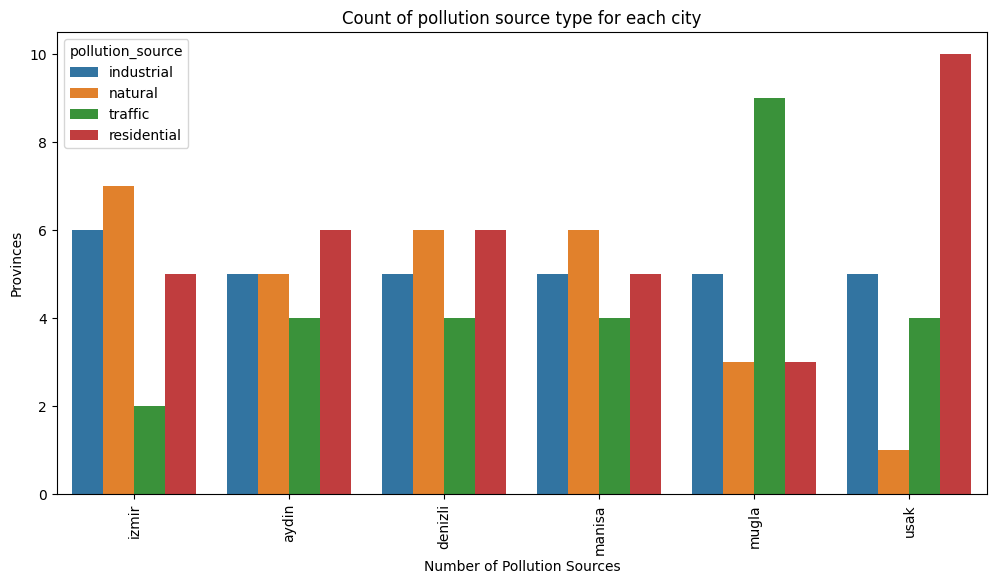

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color-blind dostu renk paleti
palette = sns.color_palette("colorblind")

# Excel dosyasını oku
df = pd.read_excel("end_cleaned_file.xlsx")

last_5_years = df['year'].max() - 5  # En büyük yıldan geriye doğru 5 yıl
df_filtered = df[df['year'] > last_5_years]


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1 = sns.countplot(data=df_filtered, x="province", hue = "pollution_source")
ax1.set_ylabel("Provinces")
ax1.set_xlabel("Number of Pollution Sources")
plt.title("Count of pollution source type for each city")
plt.xticks(rotation=90)
plt.show()





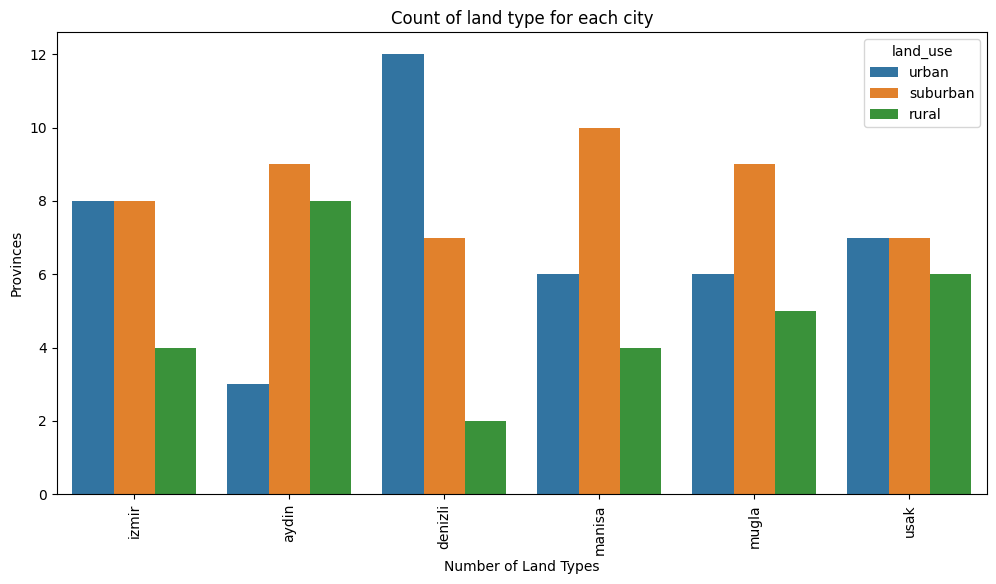

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color-blind dostu renk paleti
palette = sns.color_palette("colorblind")

# Excel dosyasını oku
df = pd.read_excel("end_cleaned_file.xlsx")

last_5_years = df['year'].max() - 5  # En büyük yıldan geriye doğru 5 yıl
df_filtered = df[df['year'] > last_5_years]


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1 = sns.countplot(data=df_filtered, x="province", hue = "land_use")
ax1.set_ylabel("Provinces")
ax1.set_xlabel("Number of Land Types")
plt.title("Count of land type for each city")
plt.xticks(rotation=90)
plt.show()

<ipython-input-11-00177700121f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(data=df, x="season", y="o3_level", palette=palette)
<ipython-input-11-00177700121f>:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax1 = sns.boxplot(data=df, x="season", y="o3_level", palette=palette)


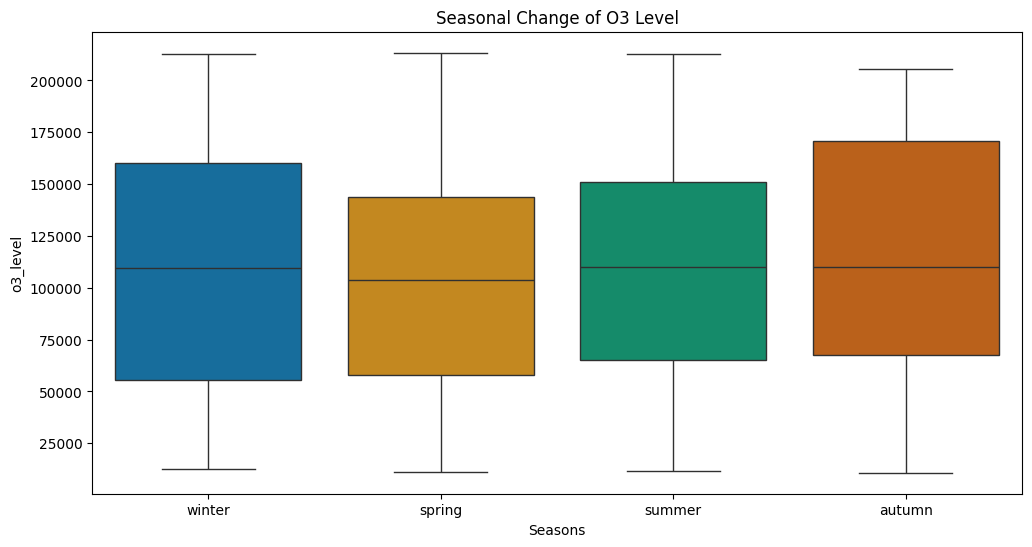

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color-blind dostu renk paleti
palette = sns.color_palette("colorblind")

# Excel dosyasını oku
df = pd.read_excel("end_cleaned_file.xlsx")

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1 = sns.boxplot(data=df, x="season", y="o3_level", palette=palette)
ax1.set_xlabel("Seasons")
plt.title("Seasonal Change of O3 Level")
plt.show()

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color-blind dostu renk paleti
palette = sns.color_palette("colorblind")

# Excel dosyasını oku
df = pd.read_excel("end_cleaned_file.xlsx")

melted_df = df.melt(id_vars=['season'], value_vars=["so2_level", "no2_level"],
                    var_name='pollutant', value_name='level')

sns.boxplot(data=melted_df, x="pollutant", y="level", hue="season", palette=palette, width=0.6)
plt.title("Seasonal Change of Air Pollutants")
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1 = sns.boxplot(data=df, x="season", y="co_level", palette=palette)
ax1.set_xlabel("Seasons")
plt.title("Seasonal Change of O3 Level")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'end_cleaned_file.xlsx'